# Step F6A: Stock price predictions with sentiments from BERT Model 1

## 1. Import required libraries

In [1]:
import pandas as pd
from datetime import datetime
import re
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import os
import ast

from scipy import stats
from sklearn import preprocessing
import tensorflow as tf
from keras.utils import np_utils
from keras import backend as bck
from sklearn.metrics import r2_score
from keras.wrappers.scikit_learn import KerasRegressor

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
stock_df = pd.read_pickle(f"C:\\Users\\Karthik\\Desktop\\Dissertation\\Final_dfs\\AMC_technical_data_df.pkl")
stock_df

,Date,YearMonDay,Open,High,Low,Volume,Dividends,Stock Splits,Close-t,log_ret,...,S-D,VPT,W-R,RSI,MOME,AC,PROC,VROC,OBV,Close
0,2020-08-05,20Aug05,4.080000,4.170000,4.070000,1691500,0,0,4.100000,0.012121,...,69.444511,1.267709e+04,29.999964,39.639640,-0.120000,0.288969,0.000000,-12.170933,-42515900,4.150000
1,2020-08-06,20Aug06,4.110000,4.240000,3.990000,3742600,0,0,4.150000,-0.002413,...,80.302965,1.160961e+04,6.896546,43.564352,-0.010000,0.285284,2.729520,33.721595,-46258500,4.140000
2,2020-08-07,20Aug07,4.140000,5.260000,4.090000,24917400,0,0,4.140000,0.137449,...,96.969631,3.662387e+06,0.000000,69.999990,0.600000,0.401975,16.995076,589.411504,-21341100,4.750000
3,2020-08-10,20Aug10,4.650000,4.740000,4.350000,5048200,0,0,4.750000,-0.060756,...,82.610648,3.373827e+06,31.818202,58.988752,0.440000,0.478889,11.749995,53.796003,-26389300,4.470000
4,2020-08-11,20Aug11,4.700000,4.850000,4.540000,5794800,0,0,4.470000,0.019934,...,75.258502,-1.809043e+05,21.590913,65.142841,0.500000,0.543382,17.829459,94.423754,-20594500,4.560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2021-09-23,21Sep23,41.060001,41.849998,39.849998,41271100,0,0,40.080002,-0.002498,...,13.004294,1.599142e+06,90.986791,40.484427,-4.040001,-6.317393,-15.654012,-57.615415,4637709200,39.980000
287,2021-09-24,21Sep24,39.810001,40.520000,39.250000,32555900,0,0,39.980000,0.000750,...,39.988367,-7.854601e+04,90.753701,41.202277,-7.820004,-7.071830,-17.539163,-62.127083,4670265100,40.009998
288,2021-09-27,21Sep27,40.119999,40.630001,39.209999,31225500,0,0,40.009998,-0.017905,...,46.869563,-5.296853e+05,96.270400,28.339250,-8.100002,-6.855595,-21.650719,-65.299062,4639039600,39.299999
289,2021-09-28,21Sep28,38.900002,39.130001,36.880001,39523300,0,0,39.299999,-0.060577,...,39.682452,-2.877236e+06,100.000000,25.869259,-11.529999,-6.631998,-28.438764,-47.380144,4599516300,36.990002


In [3]:
stock_df

,Date,YearMonDay,Open,High,Low,Volume,Dividends,Stock Splits,Close-t,log_ret,...,S-D,VPT,W-R,RSI,MOME,AC,PROC,VROC,OBV,Close
0,2020-08-05,20Aug05,4.080000,4.170000,4.070000,1691500,0,0,4.100000,0.012121,...,69.444511,1.267709e+04,29.999964,39.639640,-0.120000,0.288969,0.000000,-12.170933,-42515900,4.150000
1,2020-08-06,20Aug06,4.110000,4.240000,3.990000,3742600,0,0,4.150000,-0.002413,...,80.302965,1.160961e+04,6.896546,43.564352,-0.010000,0.285284,2.729520,33.721595,-46258500,4.140000
2,2020-08-07,20Aug07,4.140000,5.260000,4.090000,24917400,0,0,4.140000,0.137449,...,96.969631,3.662387e+06,0.000000,69.999990,0.600000,0.401975,16.995076,589.411504,-21341100,4.750000
3,2020-08-10,20Aug10,4.650000,4.740000,4.350000,5048200,0,0,4.750000,-0.060756,...,82.610648,3.373827e+06,31.818202,58.988752,0.440000,0.478889,11.749995,53.796003,-26389300,4.470000
4,2020-08-11,20Aug11,4.700000,4.850000,4.540000,5794800,0,0,4.470000,0.019934,...,75.258502,-1.809043e+05,21.590913,65.142841,0.500000,0.543382,17.829459,94.423754,-20594500,4.560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2021-09-23,21Sep23,41.060001,41.849998,39.849998,41271100,0,0,40.080002,-0.002498,...,13.004294,1.599142e+06,90.986791,40.484427,-4.040001,-6.317393,-15.654012,-57.615415,4637709200,39.980000
287,2021-09-24,21Sep24,39.810001,40.520000,39.250000,32555900,0,0,39.980000,0.000750,...,39.988367,-7.854601e+04,90.753701,41.202277,-7.820004,-7.071830,-17.539163,-62.127083,4670265100,40.009998
288,2021-09-27,21Sep27,40.119999,40.630001,39.209999,31225500,0,0,40.009998,-0.017905,...,46.869563,-5.296853e+05,96.270400,28.339250,-8.100002,-6.855595,-21.650719,-65.299062,4639039600,39.299999
289,2021-09-28,21Sep28,38.900002,39.130001,36.880001,39523300,0,0,39.299999,-0.060577,...,39.682452,-2.877236e+06,100.000000,25.869259,-11.529999,-6.631998,-28.438764,-47.380144,4599516300,36.990002


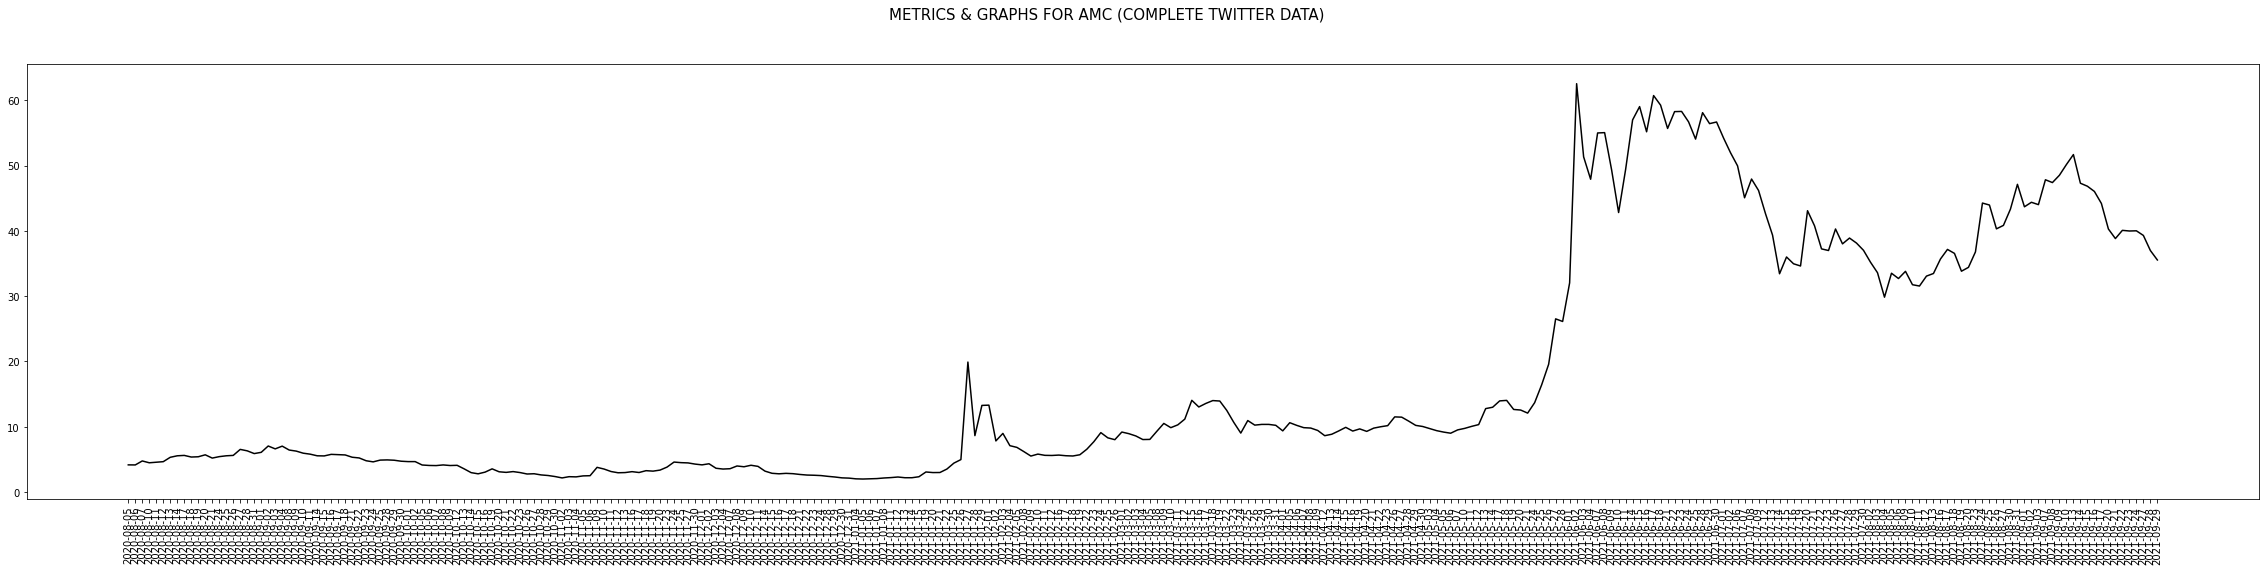

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Slider

stock_df['plot_date'] = pd.to_datetime(stock_df['Date']).apply(lambda x: x.date())

fig = plt.figure(figsize=(40,8))
fig.suptitle('METRICS & GRAPHS FOR AMC (COMPLETE TWITTER DATA)', fontsize=15, fontweight=5)
plt.plot(stock_df['Close'], color='black');
# plt.xticks(stock_df.index, stock_df['Date'], rotation=90)
plt.xticks(rotation=90, ticks=stock_df.index.tolist(), labels=stock_df['plot_date'])

plt.show();

In [5]:
stock_df[(stock_df['Date'] > '2021-05-20') & (stock_df['Date'] < '2021-06-10')]


,Date,YearMonDay,Open,High,Low,Volume,Dividends,Stock Splits,Close-t,log_ret,...,VPT,W-R,RSI,MOME,AC,PROC,VROC,OBV,Close,plot_date
200,2021-05-21,21May21,12.610000,12.840000,12.050000,53937700,0,0,12.550000,-0.038169,...,-2.457303e+06,38.767394,65.409623,2.690000,1.807261,34.222221,36.253451,3251323300,12.080000,2021-05-21
201,2021-05-24,21May24,12.380000,13.960000,12.170000,113319200,0,0,12.080000,0.124384,...,1.298919e+07,6.958239,73.913043,4.510000,1.372908,43.848580,196.298078,3364642500,13.680000,2021-05-24
202,2021-05-25,21May25,13.610000,16.670000,13.550000,213644100,0,0,13.680000,0.181956,...,5.764428e+07,0.000000,81.533101,7.410000,1.214256,68.480495,420.888790,3578286600,16.410000,2021-05-25
203,2021-05-26,21May26,17.760000,19.950001,17.260000,379064100,0,0,16.410000,0.175596,...,1.153988e+08,0.000000,86.514523,10.049999,1.848029,94.626857,664.226729,3957350700,19.559999,2021-05-26
204,2021-05-27,21May27,18.610001,29.760000,18.309999,705545700,0,0,19.559999,0.304413,...,3.238168e+08,0.000000,90.674319,16.780001,3.310105,156.976756,1196.398982,4662896400,26.520000,2021-05-27
205,2021-05-28,21May28,31.809999,36.720001,24.170000,660623600,0,0,26.520000,-0.015198,...,2.410890e+08,2.428656,88.851995,16.070001,5.657511,104.541894,122.788500,4002272800,26.120001,2021-05-28
206,2021-06-01,21Jun01,31.889999,33.529999,28.530001,508694600,0,0,26.120001,0.204284,...,1.053296e+08,0.000000,91.195206,21.720001,7.774040,146.841310,145.047856,4510967400,32.040001,2021-06-01
207,2021-06-02,21Jun02,37.520000,72.620003,35.590000,766462500,0,0,32.040001,0.668981,...,8.451554e+08,0.000000,95.872125,49.779999,12.987408,348.387097,382.254798,5277429900,62.549999,2021-06-02
208,2021-06-03,21Jun03,58.099998,68.800003,37.660000,598142200,0,0,62.549999,-0.197496,...,6.226647e+08,22.211213,79.357590,38.360001,17.006763,265.930158,246.772421,4679287700,51.340000,2021-06-03
209,2021-06-04,21Jun04,48.790001,57.480000,46.040001,337710100,0,0,51.340000,-0.069146,...,-1.297593e+08,29.007330,75.344653,33.960000,19.423150,279.034799,279.346829,4341577600,47.910000,2021-06-04


## 2. Data Preparation
*Define a data preparation function to perform the following*
- 1. Scaling
- 2. Windowing
- 3. Splitting into train, test and validation datasets
- 4. convert datasets to tensors

In [6]:
#--Global variables to be used for dataprep
TRAIN_TESTVAL_SPLIT = 0.28 #what % of data to assign for test and validation datasets
TEST_VAL_SPLIT = 0.5 #what percentage of test data to assign for validation dataset
BATCH_SIZE = 5
N_TIME_STEPS = 5 #sliding window length
STEP = 1 #Since we have very little data, we set the sliding window step size as 1
N_FEATURES = 19
scaler = MinMaxScaler(feature_range = (-1, 1))


#--Function to complete all dataprep steps and return required datasets
def complete_data_prep(data_df, date_df):
    #--Scaling   
#     data_df = data_df[['ACD','MACD','CHO','Highest_T','Lowest_T','S-K','S-D','VPT','W-R','RSI','MOME','AC','PROC','VROC','OBV','positive','neutral','negative','log_ret-t','Close']]
    data_df.iloc[:] = scaler.fit_transform(data_df.iloc[:].values)

    def data_split_and_sliding_window(x, y, train_testval_split, test_val_split, n_time_steps, step):

        def sliding_window_fnc(x,y, n_time_steps, step):
            input_window = []
            output_window = []
            date_window = []
            len_x = x.shape[0]
            for i in range(0, len_x-n_time_steps, step):
                input_window.append(x.iloc[i:i+n_time_steps, 0:-1].values)
                output_window.append(x.iloc[i+n_time_steps, -1])
                date_window.append(y.iloc[i+n_time_steps])
            print('I/O Window lengths', len(np.array(input_window)), len(np.array(output_window)))
            return np.array(input_window), np.array(output_window), np.array(date_window)

        windowed_dataset_x, windowed_dataset_y, date_window = sliding_window_fnc(x, y, n_time_steps, step)

        #--Split dataset into trianing, testing and validation sets
        full_window_length = len(windowed_dataset_x)
        training_data_length = round((1-TRAIN_TESTVAL_SPLIT)*full_window_length)
        validation_data_length = round((full_window_length - training_data_length)/2 )
        testing_data_length = full_window_length - validation_data_length - training_data_length

        val_recs_end = round(training_data_length + validation_data_length)

        train_x = windowed_dataset_x[0:training_data_length]
        train_y = windowed_dataset_y[0:training_data_length]
        val_x = windowed_dataset_x[training_data_length:val_recs_end]
        val_y = windowed_dataset_y[training_data_length:val_recs_end]
        test_x = windowed_dataset_x[val_recs_end:]
        test_y = windowed_dataset_y[val_recs_end:]
        test_dates = date_window[val_recs_end:]
        val_dates = date_window[training_data_length:val_recs_end]
        train_dates = date_window[0:training_data_length]

        print(f'Length of training data = x: {len(train_x)}, y: {len(train_y)}')
        print(f'Length of val data = x: {len(val_x)}, y: {len(val_y)}')
        print(f'Length of test data = x: {len(test_x)}, y: {len(test_y)}')

        return train_x, train_y, test_x, test_y, val_x, val_y, test_dates, val_dates, train_dates
    
    def tf_dataset(series_x, series_y, batch_size, shuffle_buffer, shuffle=True):
        ds = tf.data.Dataset.from_tensor_slices((series_x, series_y))
        if shuffle:
            ds = ds.cache().shuffle(shuffle_buffer).batch(batch_size).repeat()
        else:
            ds = ds.cache().batch(batch_size).repeat()

        return ds


    data_train_x, data_train_y, data_val_x, data_val_y, data_test_x, data_test_y,data_test_dates, data_val_dates, data_train_dates = data_split_and_sliding_window(data_df, date_df, TRAIN_TESTVAL_SPLIT,TEST_VAL_SPLIT,N_TIME_STEPS,STEP)

    train_set = tf_dataset(data_train_x, data_train_y, BATCH_SIZE, 1000)
    unshuffled_train_set = tf_dataset(data_train_x, data_train_y, BATCH_SIZE, 1000, False)
    validation_set = tf_dataset(data_val_x, data_val_y, 5, 1000, False)
    test_set = tf_dataset(data_test_x, data_test_y, BATCH_SIZE, 1000, False)

    return data_train_x.shape[0], data_train_x.shape[1], data_train_x.shape[2], data_val_x.shape[0], data_test_x.shape[0], train_set, unshuffled_train_set, validation_set, test_set, data_train_y, data_val_y, data_test_y,data_test_dates, data_val_dates, data_train_dates
    

## 3. Model preparation
*Define a function to house the CNN-LSTM model and to return the results of predictions and metrics*

In [7]:
def build_model_and_predict(train_set, unshuffled_train_set, validation_set, test_set,
                            data_train_y, data_val_y, data_test_y,
                            train_x_shape_0, trains_x_shape_1, train_x_shape_2, val_x_shape_0, test_x_shape_0,
                            batch_size=5,epochs=20,
                            optimizer_fnc='Adam', learning_rt=0.001, 
                            conv_filters=32, conv_activation='tanh', conv_kernel_size=1,
                            second_conv_layer=False, second_conv_filters=64, second_conv_activation='tanh', second_conv_kernel_size=2,
                            pool_size=2, 
                            lstm_units=64, 
                            second_dense_layer=False, dense_units=32):

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=conv_filters,
                                       kernel_size=conv_kernel_size,
                                       strides=1,
                                       padding="same",
                                       activation=conv_activation,
                                       input_shape=(train_x_shape_1,train_x_shape_2))
                                 )
    if second_conv_layer == True:
        model.add(tf.keras.layers.Conv1D(filters=second_conv_filters,
                                           kernel_size=second_conv_kernel_size,
                                           strides=1,
                                           padding="same",
                                           activation=second_conv_activation,
                                           input_shape=((train_x_shape_1-conv_kernel_size)+1,conv_filters))
                                     )
    model.add(tf.keras.layers.MaxPooling1D(pool_size=pool_size, strides=1, padding="same"))
    model.add(tf.keras.layers.LSTM(lstm_units, return_sequences=True))
    model.add(tf.keras.layers.Flatten())
    if second_dense_layer == True:
        model.add(tf.keras.layers.Dense(dense_units))
    model.add(tf.keras.layers.Dense(1))

    OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=learning_rt)

    if optimizer_fnc == 'SGD':
        OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=learning_rt)
    elif optimizer_fnc == 'Nadam':
        OPTIMIZER = tf.keras.optimizers.Nadam(learning_rate=learning_rt)
    elif optimizer_fnc == 'RMSprop':
        OPTIMIZER = tf.keras.optimizers.RMSprop(learning_rate=learning_rt)
    elif optimizer_fnc == 'Adadelta':
        OPTIMIZER = tf.keras.optimizers.Adadelta(learning_rate=learning_rt)
    elif optimizer_fnc == 'Adagrad':
        OPTIMIZER = tf.keras.optimizers.Adagrad(learning_rate=learning_rt)
    elif optimizer_fnc == 'Adamax':
        OPTIMIZER = tf.keras.optimizers.Adamax(learning_rate=learning_rt)        

    model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=OPTIMIZER, metrics=['mae'])

    train_step = math.ceil(train_x_shape_0/5)
    validation_step = math.ceil(val_x_shape_0/5)
    test_step = math.ceil(test_x_shape_0/5)

    #--Model training
    history = model.fit(train_set,
                        epochs=epochs,
                        steps_per_epoch=train_step,
                        validation_data=validation_set,
                        validation_steps=validation_step,
                        verbose=0)
    
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    diff_in_loss=abs(np.subtract(loss_val,loss_train));
    loss_df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})

    #--Model prediction
    pred_train_x = model.predict(unshuffled_train_set, steps=train_step)
    pred_val_x = model.predict(validation_set, steps=validation_step)
    pred_test_x = model.predict(test_set, steps=test_step)

    predictions = np.concatenate((pred_train_x[:,0], pred_val_x[:,0],pred_test_x[:,0]))
    true_vals = np.concatenate((data_train_y, data_val_y, data_test_y))

    #--Perform inverse scaling to get the price values
    true_val2 = np.c_[np.zeros((true_vals.shape[0],train_x_shape_2)), true_vals]
    temp_col_list = [str(i) for i in range(0,train_x_shape_2)]
    temp_col_list.append('Close')
    true_df = pd.DataFrame(true_val2, columns=temp_col_list)
    true_df.iloc[:] = scaler.inverse_transform(true_df.iloc[:].values)

    pred_val2 = np.c_[np.zeros((predictions.shape[0],train_x_shape_2)), predictions]
    pred_df = pd.DataFrame(pred_val2, columns=temp_col_list)
    pred_df.iloc[:] = scaler.inverse_transform(pred_df.iloc[:].values)

    close_data = [true_df["Close"], pred_df["Close"]]
    close_df = pd.concat(close_data, axis=1, keys=['true_close', 'pred_close'])

    #--Compute metrics
    def compute_perf_metrics(true_vals, pred_vals):    
        metrics_result = []

        keras_metrics = [
        tf.keras.metrics.MeanAbsoluteError(),
        tf.keras.metrics.RootMeanSquaredError(),
        tf.keras.metrics.MeanAbsolutePercentageError(),
        tf.keras.metrics.MeanSquaredError()
        ]

        for metric in keras_metrics:
            metric.reset_states()
            metric.update_state(true_vals, pred_vals)
            metrics_result.append(metric.result().numpy())  

        metrics_result.append(r2_score(true_vals, pred_vals))
        return metrics_result

    
    print(f'Training data lengths = data_train_y: {len(data_train_y)}, pred_train_x: {len(pred_train_x)}')
    print(f'Val data lengths = data_val_y: {len(data_val_y)}, pred_val_x: {len(pred_val_x)}')
    print(f'Test data lengths = data_test_y: {len(data_test_y)}, pred_test_x: {len(pred_test_x)}')
    
    
    train_metrics = compute_perf_metrics(data_train_y, pred_train_x)
    train_metrics.insert(0, 'Train')
    val_metrics = compute_perf_metrics(data_val_y, pred_val_x)
    val_metrics.insert(0, 'Validation')
    test_metrics = compute_perf_metrics(data_test_y, pred_test_x)
    test_metrics.insert(0, 'Test')

    COL_NAMES = ['dataset','MAE','RMSE','MAPE','MSE','R2']
    metrics_table = pd.DataFrame([train_metrics, val_metrics, test_metrics], columns=COL_NAMES)
#     metrics_table = metrics_table.set_index([''])
    metrics_table.round(5)

    return loss_df, close_df, metrics_table

## 4. Input data
*Read all the required input data into a dictionary from the pickle files saved in precious steps*

In [8]:
twitter_data_df = {}
twitter_date_df = {}

tick = 'AMC'

stock_df = pd.read_pickle(f"C:\\Users\\Karthik\\Desktop\\Dissertation\\Final_dfs\\{tick}_technical_data_df.pkl")

for i in range(1,5):
    
    model = f"model{i}"

    tick_list =  ['AMC']

    if model not in twitter_data_df:
        twitter_data_df[model] = {}

    twitter_sentiment_data = pd.DataFrame()

    if model=='model1':
        twitter_sentiment_data = pd.read_pickle(f"C:\\Users\\Karthik\\Desktop\\Dissertation\\Final_dfs\\twitter_{tick}_BERT_TwitterAirline_Even.pkl")

    elif model == 'model2':
        twitter_sentiment_data = pd.read_pickle(f"C:\\Users\\Karthik\\Desktop\\Dissertation\\Final_dfs\\twitter_{tick}_BERT_TwitterAirline_Uneven.pkl") 

    elif model == 'model3':
        twitter_sentiment_data = pd.read_pickle(f"C:\\Users\\Karthik\\Desktop\\Dissertation\\Final_dfs\\twitter_{tick}_BERT_Sentiment140.pkl")

    elif model == 'model4':
        twitter_sentiment_data = pd.read_pickle(f"C:\\Users\\Karthik\\Desktop\\Dissertation\\Final_dfs\\twitter_{tick}_finBERT.pkl")

    temp_twitter_data = pd.merge(stock_df, twitter_sentiment_data, how="inner", on="YearMonDay")

    #--Get the dates which will be used later for visualizations
    twitter_date_df[model] = temp_twitter_data['Date'].apply(lambda x: datetime.strftime(x, '%d-%m-%Y'))

    if model == 'model3':        
        twitter_data_df[model] = temp_twitter_data[['ACD','MACD','CHO','Highest_T','Lowest_T','S-K','S-D','VPT','W-R','RSI','MOME','AC','PROC','VROC','OBV','positive','negative','log_ret-t','Close']]
    else:
        twitter_data_df[model] = temp_twitter_data[['ACD','MACD','CHO','Highest_T','Lowest_T','S-K','S-D','VPT','W-R','RSI','MOME','AC','PROC','VROC','OBV','positive','neutral','negative','log_ret-t','Close']]


*Read the tuned hyperparameters for all models in a dataframe*
- *The parameters for each ticker will be read from this dataframe and passed to the CNN-LSTM model*

In [9]:
tuning_results = pd.read_pickle(r'C:\\Users\\Karthik\\Desktop\\Dissertation\\Hyperparameter tuning\\Tuning_results.pkl')

## 5. Predict using CNN-LSTM models
- *Use input data to predict stock prices*
- *Save the results as csv files for later use*

Performing training and prediction using twiiter sentiments with all available data for twitter
I/O Window lengths 286 286
Length of training data = x: 206, y: 206
Length of val data = x: 40, y: 40
Length of test data = x: 40, y: 40
Training data lengths = data_train_y: 206, pred_train_x: 206
Val data lengths = data_val_y: 40, pred_val_x: 40
Test data lengths = data_test_y: 40, pred_test_x: 40
Performing training and prediction using twiiter sentiments with all available data for twitter
I/O Window lengths 286 286
Length of training data = x: 206, y: 206
Length of val data = x: 40, y: 40
Length of test data = x: 40, y: 40
Training data lengths = data_train_y: 206, pred_train_x: 206
Val data lengths = data_val_y: 40, pred_val_x: 40
Test data lengths = data_test_y: 40, pred_test_x: 40
Performing training and prediction using twiiter sentiments with all available data for twitter
I/O Window lengths 286 286
Length of training data = x: 206, y: 206
Length of val data = x: 40, y: 40
Length o

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


I/O Window lengths 286 286
Length of training data = x: 206, y: 206
Length of val data = x: 40, y: 40
Length of test data = x: 40, y: 40
Training data lengths = data_train_y: 206, pred_train_x: 206
Val data lengths = data_val_y: 40, pred_val_x: 40
Test data lengths = data_test_y: 40, pred_test_x: 40


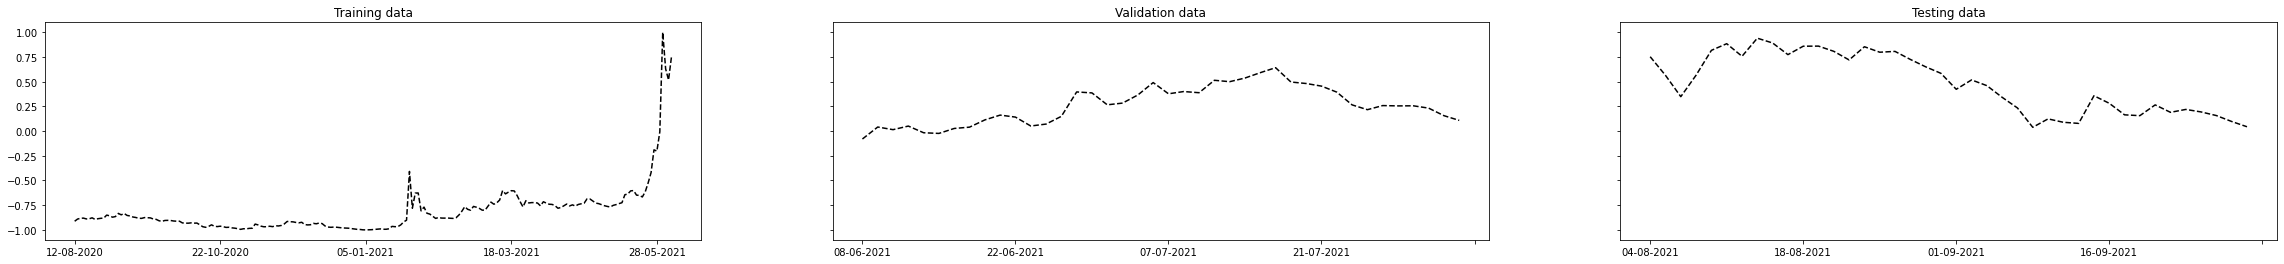

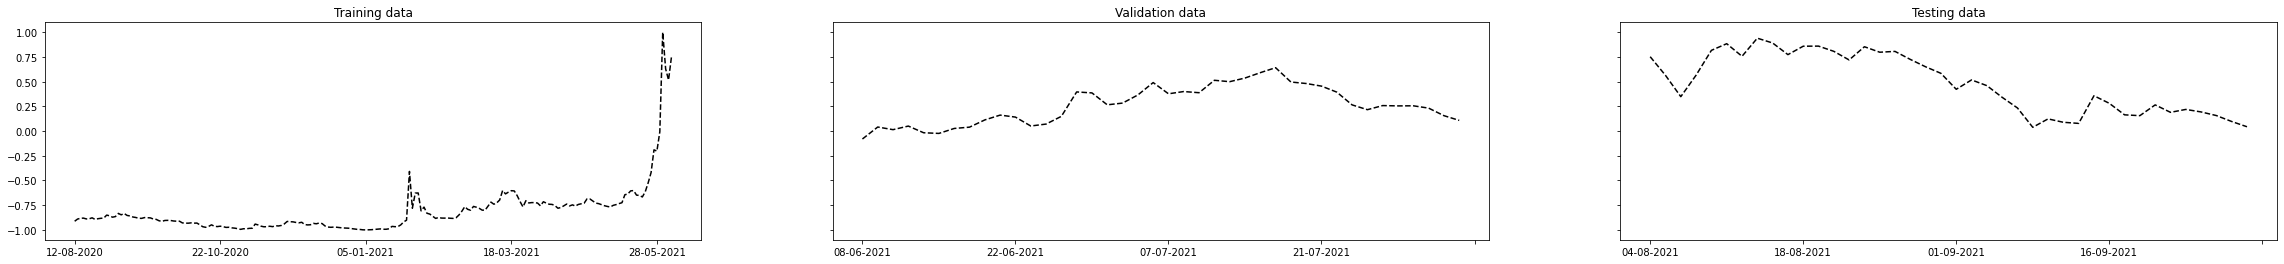

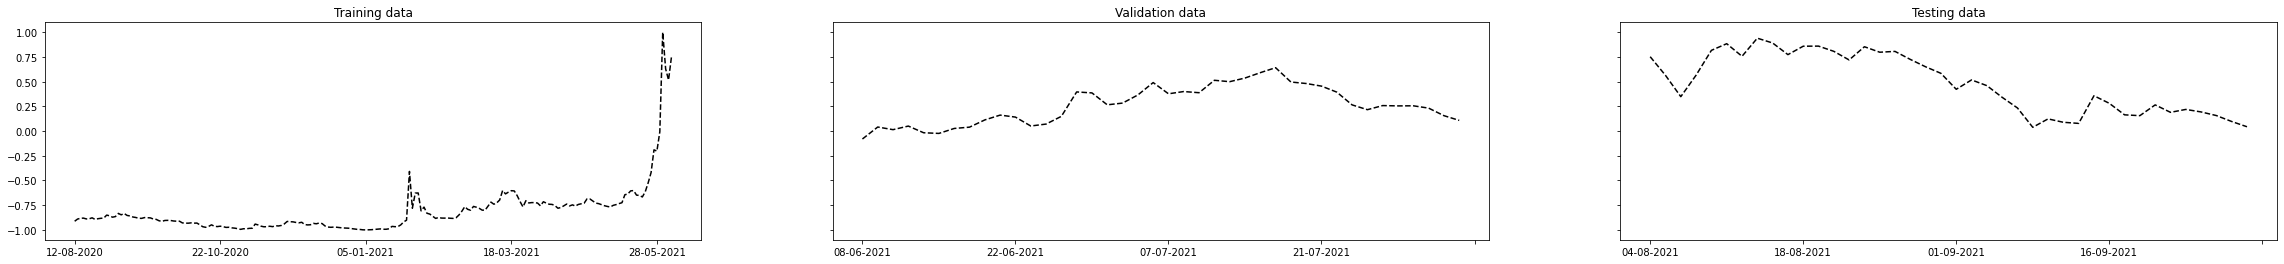

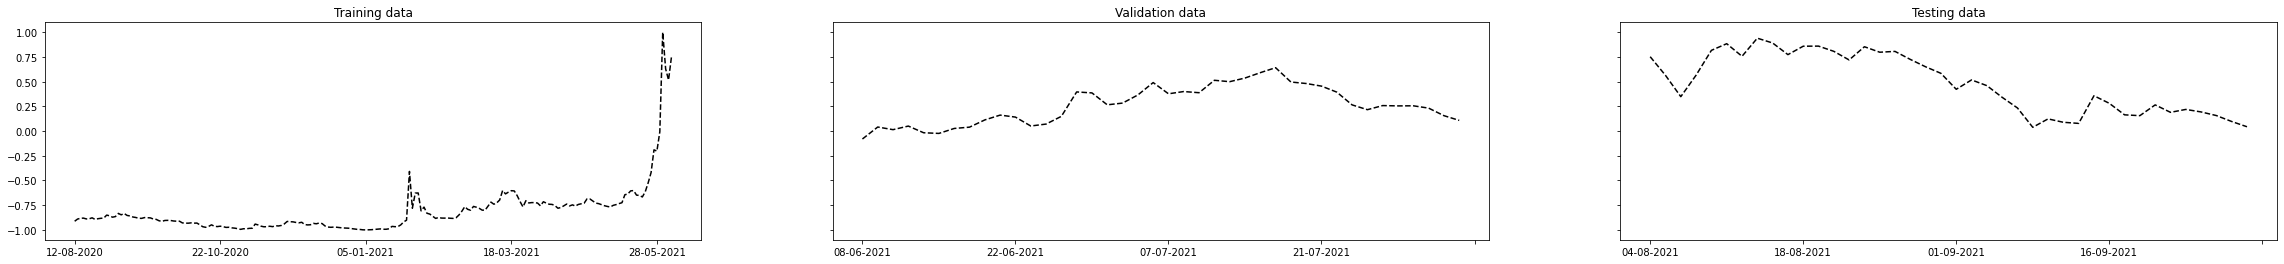

In [10]:
from matplotlib import pyplot as plt

path = r'C:\\Users\\Karthik\\Desktop\\Dissertation\\Plots and metrics\\Extra\\'

results_df = {}

for model, model_df in twitter_data_df.items():
    print('Performing training and prediction using twiiter sentiments with all available data for twitter')
    
    date_df = twitter_date_df[model]

    train_x_shape_0, train_x_shape_1, train_x_shape_2, val_x_shape_0, test_x_shape_0, train_set, unshuffled_train_set, validation_set, test_set, data_train_y, data_val_y, data_test_y, data_test_dates, data_val_dates, data_train_dates = complete_data_prep(model_df, date_df)

    req_dict = tuning_results[tuning_results['ticker'] == "AMC"].to_dict('list')

    loss_df, close_df, metrics_table = build_model_and_predict(train_set, unshuffled_train_set, validation_set, test_set,
                                                                data_train_y, data_val_y, data_test_y,
                                                                train_x_shape_0, train_x_shape_1, train_x_shape_2, val_x_shape_0, test_x_shape_0,
                                                                batch_size=req_dict['batch_size'][0],
                                                                epochs=req_dict['epochs'][0],
                                                                optimizer_fnc=req_dict['optimizer_fnc'][0], 
                                                                learning_rt=req_dict['learning_rt'][0], 
                                                                conv_filters=req_dict['conv_filters'][0], 
                                                                conv_activation=req_dict['conv_activation'][0], 
                                                                conv_kernel_size=req_dict['conv_kernel_size'][0],
                                                                second_conv_layer=req_dict['second_conv_layer'][0], 
                                                                second_conv_filters=req_dict['second_conv_filters'][0], 
                                                                second_conv_activation=req_dict['second_conv_activation'][0], 
                                                                second_conv_kernel_size=req_dict['second_conv_kernel_size'][0],
                                                                pool_size=req_dict['pool_size'][0], 
                                                                lstm_units=req_dict['lstm_units'][0], 
                                                                second_dense_layer=req_dict['second_dense_layer'][0], 
                                                                dense_units=req_dict['dense_units'][0])


    close_df = pd.concat([twitter_date_df[model], close_df], axis=1)
    close_df['model'] = f'BERT {model}'
    close_df['platform'] = 'twitter'
    close_df['ticker'] = tick    
#     close_df.to_csv(f'{path}AMC_reddit_predictions_BERT{model}.csv', index=False)
    
    metrics_table.iloc[:,1:] = metrics_table.iloc[:,1:].applymap(lambda x: float('%.5f'%(x)))
    metrics_table['model'] = f'BERT {model}'
    metrics_table['ticker'] = tick
    metrics_table['platform'] = 'twitter'    
#     metrics_table.to_csv(f'{path}AMC_reddit_metrics_BERT{model}.csv', index=False)
    
    results_df[model] = {}
    results_df[model]['close'] = close_df
    results_df[model]['metrics'] = metrics_table
    
    fig, ax = plt.subplots(1, 3, figsize=(40, 4), sharey=True)
    ax[0].plot(data_train_dates, data_train_y, color='black', linestyle='--')
    ax[0].title.set_text('Training data')
    ax[1].plot(data_val_dates, data_val_y, color='black', linestyle='--')
    ax[1].title.set_text('Validation data')
    ax[2].plot(data_test_dates, data_test_y, color='black', linestyle='--')
    ax[2].title.set_text('Testing data')
    for axi in ax.flat:
        axi.xaxis.set_major_locator(plt.MaxNLocator(5))

## 6. Plots
- *Read the saved predictions and metrics into a dictionary*
- *Use matplotlib module to plot predictions and metrics as figures*


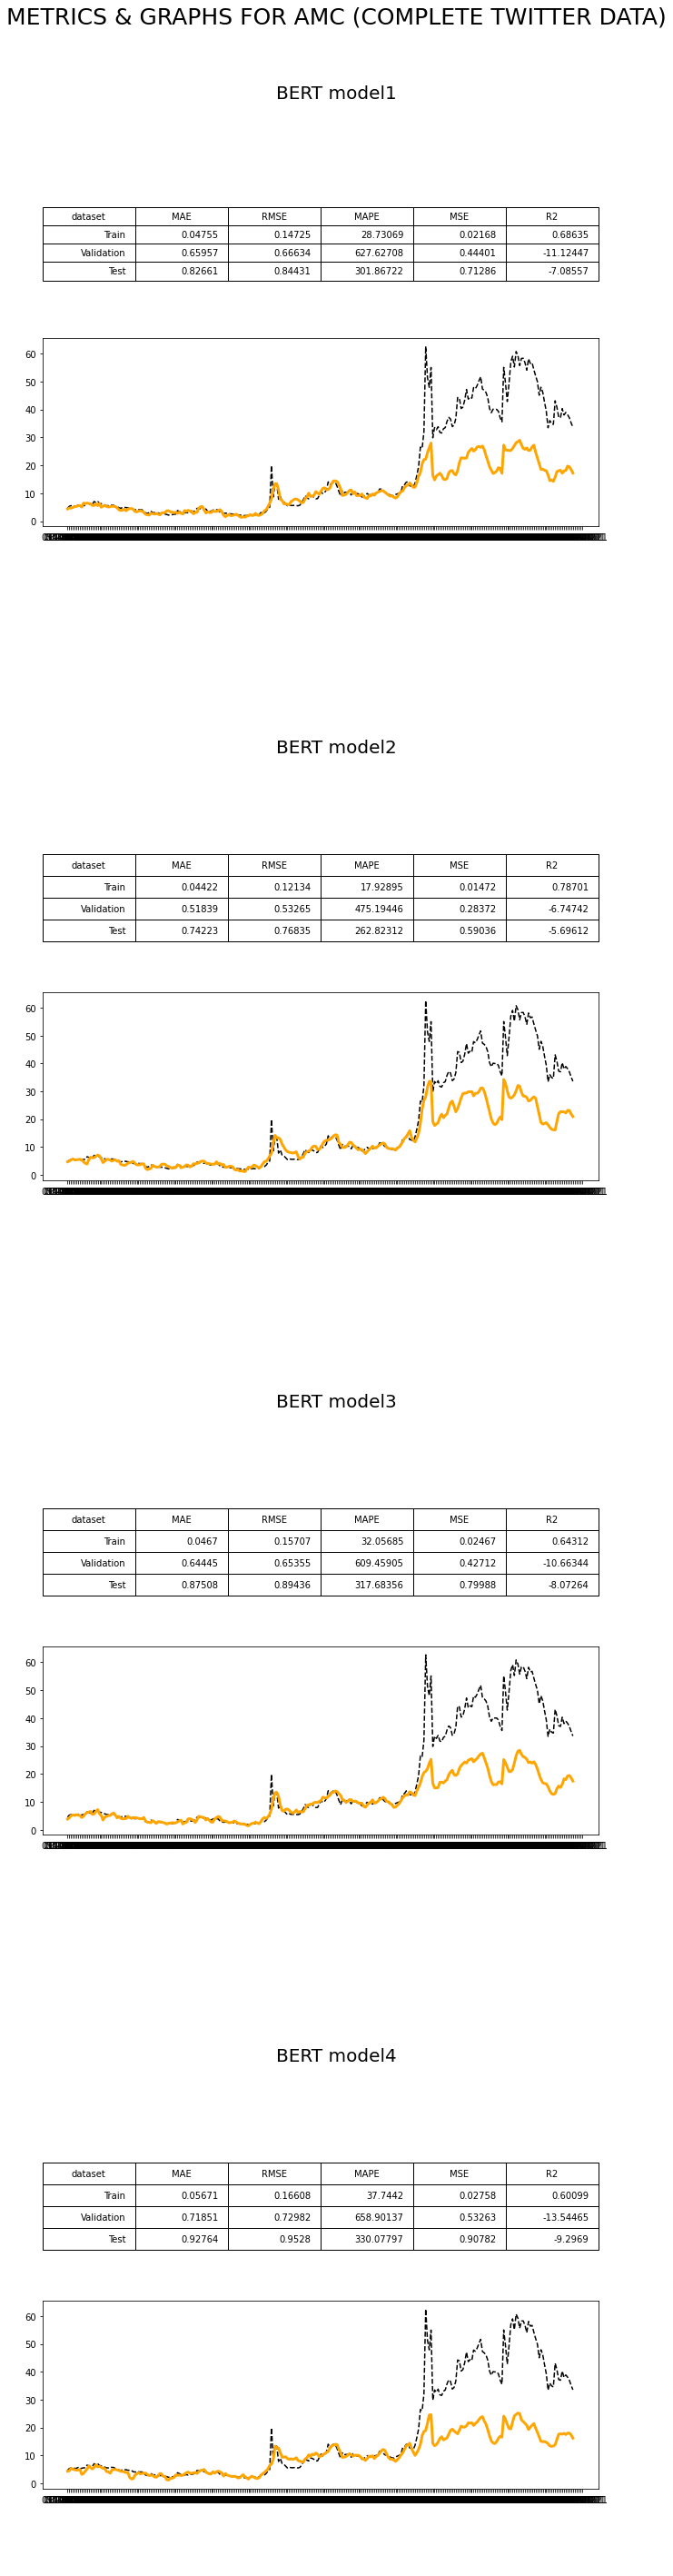

In [11]:
import matplotlib.pyplot as plt

# fig = plt.figure(constrained_layout=True, figsize=(30, 60))
fig = plt.figure(figsize=(10, 40))
fig.suptitle('METRICS & GRAPHS FOR AMC (COMPLETE TWITTER DATA)', fontsize=25, fontweight=5)
subfigs = fig.subfigures(nrows=len(results_df), ncols=1, hspace = 1)

subfig_no = 0

for model, model_df in results_df.items():
       
    ax = subfigs[subfig_no].subplots(nrows=2, ncols=1)
    subplot_col_n = 0
    subfigs[subfig_no].suptitle(f'BERT {model}', fontsize=20, y=0.80)
    
    #--plot the metrics results
    tmp = model_df['metrics'].iloc[:,:6]
    tmp.iloc[:,1:6]=tmp.iloc[:,1:6].applymap(lambda x: float('%.5f'%(x)))
    table = ax[subplot_col_n].table(cellText=tmp.values, colLabels=model_df['metrics'].columns, loc='center')
    ax[subplot_col_n].patch.set_visible(False)
    ax[subplot_col_n].axis('off')
    ax[subplot_col_n].axis('tight')
#     ax[subplot_col_n].set_title('Twitter', pad=-14, y=1)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1,2)

    #--increment row_n
    subplot_col_n += 1

    #--plot the line graphs
    plot_df = model_df['close']
    ax[subplot_col_n].plot(plot_df['Date'], plot_df['true_close'], color='black', linestyle='--');
    ax[subplot_col_n].plot(plot_df['Date'], plot_df['pred_close'], color='orange', linewidth=3);

    subfig_no += 1
    
    fig.subplots_adjust(left=0.05, bottom=None, right=None, top=0.7, wspace=0.1, hspace=0.0001)

# path = r'C:\\Users\\Karthik\\Desktop\\Dissertation\\Plots and metrics\\Extra\\'
# plt.savefig(f'{path}AMC Predictions with complete twitter data.jpg')
# plt.show();